# Modeling exercise

## General Instructions

* Submission date: 14.5.2023
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1GNPESGIhJpPb7LwMAyjF5qpJfZQak_mLkE3i5Y7a_VA/edit?usp=sharing).

In [4]:
import sys; sys.path.append('../src')
import numpy as np
import plotly_express as px

In [5]:
import pandas as pd
import ipywidgets as widgets

In [6]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [7]:
from sklearn.datasets import make_moons

In [8]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

,x,y,label
0,1.881700,0.241516,B
1,0.695042,0.704073,A
2,0.604733,0.922232,A
3,0.947819,0.070699,A
4,-0.302817,0.911427,A


In [154]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [10]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.514440,0.857527,A
1,-0.799747,0.020104,B
2,-0.509939,0.616411,B
3,-0.787651,0.140018,B
4,-0.130110,0.789349,B


In [11]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

You experiment code should look something like that:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score

In [9]:
datasets_type = ['circles', 'moons']
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
n_samples = [100, 1000, 10000]
samples_df = pd.DataFrame(columns = ['ds_type', 'noise_level', 'x', 'y', 'label'])

In [10]:
def fn_make_sample_df(ds_type, noise_level):
    if ds_type == 'circles':
        s_df = make_circles_dataframe(10000, noise_level)
    elif ds_type == 'moons':
        s_df = make_moons_dataframe(10000, noise_level)
    else:
        return None
    
    s_df['ds_type'] = ds_type
    s_df['noise_level'] = noise_level
    
    return s_df   

In [11]:
for ds_type in datasets_type:
    for nl in noise_levels:
        samples_df =  pd.concat([samples_df, fn_make_sample_df(ds_type, nl)], ignore_index=True)

In [12]:
samples_df.groupby(['ds_type', 'noise_level', 'label']).size()

ds_type  noise_level  label
circles  0.0          A        5000
                      B        5000
         0.1          A        5000
                      B        5000
         0.2          A        5000
                      B        5000
         0.3          A        5000
                      B        5000
         0.4          A        5000
                      B        5000
         0.5          A        5000
                      B        5000
moons    0.0          A        5000
                      B        5000
         0.1          A        5000
                      B        5000
         0.2          A        5000
                      B        5000
         0.3          A        5000
                      B        5000
         0.4          A        5000
                      B        5000
         0.5          A        5000
                      B        5000
dtype: int64

In [82]:
k_folds = 10
kf = KFold(n_splits = k_folds)
clf_types = ['log_reg', 'svm']
hp_range =  [0.01, 1, 100]
regularization_values = [0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(columns = ['ds_type', 'noise_level', 'n_samples','clf_type', 'k_fold', 'gamma', 'reg_val_c', 'train_acc', 'test_acc', 'score'])

In [51]:
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            curr_sample_df = samples_df.query('ds_type == @ds_type & noise_level == @nl').head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            #x_train, x_test, y_train, y_test = train_test_split(curr_sample_df.loc[:,['x', 'y']], curr_sample_df.label, test_size = 0.2, shuffle = True, random_state = 78)
            X, Y = curr_sample_df.loc[:,['x', 'y']], curr_sample_df.label
            
            for clf_type in clf_types:
                if clf_type == 'log_reg':
                    for regularization_value in regularization_values:
                        log_reg = LogisticRegression(fit_intercept=True, penalty='l2',C = regularization_value)
                        cross_val = cross_validate(log_reg, X, Y, cv = kf, return_train_score = True)
                        for k in range(k_folds):
                            train_acc = cross_val['test_score'][k]
                            test_acc = cross_val['train_score'][k]
                            results_df.loc[len(results_df.index)] = ([ds_type, nl, n, clf_type, k, None, regularization_value, train_acc, test_acc, test_acc/train_acc])
                            
                if clf_type == 'svm':
                    for hp in hp_range:
                        for regularization_value in regularization_values:
                            svm  = SVC(kernel = "rbf", gamma = hp, C = regularization_value)
                            cross_val = cross_validate(svm, X, Y, cv = kf, return_train_score = True)
                            for k in range(k_folds):
                                train_acc = cross_val['test_score'][k]
                                test_acc = cross_val['train_score'][k]
                                results_df.loc[len(results_df.index)] = ([ds_type, nl, n, clf_type, k, hp, regularization_value, train_acc, test_acc, test_acc/train_acc])
  
print('End')

Working on circles
Starting 10-fold cross validation for circles datasets with 100 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 10000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 100 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 10000 samples and noise level 0.1. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 100 samples and noise level 0.2. Going to train ['log_reg', 'svm'] classifiers.
S

In [127]:
results_df = pd.read_csv("results_df.csv", index_col = 0)

In [128]:
results_df = results_df.fillna(value = 'N/A')

In [129]:
results_df.head(20)

,ds_type,noise_level,n_samples,clf_type,k_fold,gamma,reg_val_c,train_acc,test_acc,score
0,circles,0.0,100,log_reg,0,N/A,0.01,0.6,0.655556,1.092593
1,circles,0.0,100,log_reg,1,N/A,0.01,0.5,0.666667,1.333333
2,circles,0.0,100,log_reg,2,N/A,0.01,0.5,0.666667,1.333333
3,circles,0.0,100,log_reg,3,N/A,0.01,0.7,0.644444,0.920635
4,circles,0.0,100,log_reg,4,N/A,0.01,0.8,0.633333,0.791667
5,circles,0.0,100,log_reg,5,N/A,0.01,0.8,0.633333,0.791667
6,circles,0.0,100,log_reg,6,N/A,0.01,0.6,0.655556,1.092593
7,circles,0.0,100,log_reg,7,N/A,0.01,0.7,0.644444,0.920635
8,circles,0.0,100,log_reg,8,N/A,0.01,0.6,0.655556,1.092593
9,circles,0.0,100,log_reg,9,N/A,0.01,0.7,0.644444,0.920635


In [130]:
g_results_df = results_df.groupby(['ds_type', 'noise_level', 'n_samples', 'clf_type', 'gamma', 'reg_val_c']) \
    ['train_acc', 'test_acc', 'score'].agg(['mean', 'std']).reset_index()

g_results_df.columns = g_results_df.columns.map('_'.join).str.strip('_')

C:\Users\yibar\AppData\Local\Temp\ipykernel_20848\1499613493.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

In [133]:
##1
g_results_df.query('clf_type == "svm" & noise_level == 0 & n_samples == 10000') \
   .sort_values(by = ['ds_type', 'test_acc_mean', 'gamma', 'reg_val_c'] ,ascending = [True, False, False, True])

,ds_type,noise_level,n_samples,clf_type,gamma,reg_val_c,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,score_mean,score_std
55,circles,0.0,10000,svm,100.0,0.01,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
56,circles,0.0,10000,svm,100.0,0.10,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
57,circles,0.0,10000,svm,100.0,1.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
58,circles,0.0,10000,svm,100.0,10.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
59,circles,0.0,10000,svm,100.0,100.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
50,circles,0.0,10000,svm,1.0,0.01,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
51,circles,0.0,10000,svm,1.0,0.10,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
52,circles,0.0,10000,svm,1.0,1.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
53,circles,0.0,10000,svm,1.0,10.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
54,circles,0.0,10000,svm,1.0,100.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000


In [159]:
g_results_df.query('clf_type == "svm" & ds_type == "moons" & noise_level > 0 & n_samples == 10000') \
   .sort_values(by = ['noise_level', 'test_acc_mean'] ,ascending = [True, False]) \
   .groupby('noise_level').head(5)

,ds_type,noise_level,n_samples,clf_type,gamma,reg_val_c,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,score_mean,score_std,stablity
479,moons,0.1,10000,svm,100.0,100.0,0.9984,0.000843,0.999844,0.000057,1.001447,0.000881,0.001447
478,moons,0.1,10000,svm,100.0,10.0,0.9990,0.000943,0.999667,0.000117,1.000668,0.001015,0.000668
477,moons,0.1,10000,svm,100.0,1.0,0.9992,0.000789,0.999533,0.000137,1.000334,0.000898,0.000334
474,moons,0.1,10000,svm,1.0,100.0,0.9994,0.000699,0.999422,0.000088,1.000023,0.000776,0.000023
476,moons,0.1,10000,svm,100.0,0.1,0.9993,0.000675,0.999400,0.000078,1.000101,0.000746,0.000101
539,moons,0.2,10000,svm,100.0,100.0,0.9633,0.006343,0.975000,0.000912,1.012190,0.007460,0.012190
538,moons,0.2,10000,svm,100.0,10.0,0.9659,0.006100,0.972967,0.000511,1.007355,0.006829,0.007355
537,moons,0.2,10000,svm,100.0,1.0,0.9679,0.005744,0.971622,0.000620,1.003881,0.006546,0.003881
536,moons,0.2,10000,svm,100.0,0.1,0.9685,0.005359,0.970522,0.000761,1.002119,0.006204,0.002119
533,moons,0.2,10000,svm,1.0,10.0,0.9696,0.004766,0.970011,0.000627,1.000448,0.005481,0.000448


In [136]:
g_results_df.query('clf_type == "svm" & ds_type == "circles" & n_samples == 10000') \
   .sort_values(by = ['noise_level', 'test_acc_mean'] ,ascending = [True, False]) \
   .groupby('noise_level').head(5)

,ds_type,noise_level,n_samples,clf_type,gamma,reg_val_c,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,score_mean,score_std
48,circles,0.0,10000,svm,0.01,10.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
49,circles,0.0,10000,svm,0.01,100.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
50,circles,0.0,10000,svm,1.0,0.01,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
51,circles,0.0,10000,svm,1.0,0.10,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
52,circles,0.0,10000,svm,1.0,1.00,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
119,circles,0.1,10000,svm,100.0,100.00,0.8315,0.009925,0.848911,0.001724,1.021087,0.013809
118,circles,0.1,10000,svm,100.0,10.00,0.8331,0.009110,0.846111,0.001510,1.015741,0.012592
117,circles,0.1,10000,svm,100.0,1.00,0.8353,0.010510,0.843600,0.001200,1.010096,0.014048
116,circles,0.1,10000,svm,100.0,0.10,0.8345,0.011835,0.840756,0.000854,1.007687,0.014980
114,circles,0.1,10000,svm,1.0,100.00,0.8339,0.011714,0.836711,0.001346,1.003568,0.015631


In [137]:
##2
g_results_df['stablity'] = g_results_df.score_mean.apply(lambda i: abs(i - 1))

In [151]:
g_results_df.query('clf_type == "svm" & n_samples == 10000') \
   .groupby(['ds_type','gamma','reg_val_c']).stablity.mean().sort_values(ascending = True).reset_index()

,ds_type,gamma,reg_val_c,stablity
0,moons,1.00,0.10,0.000261
1,moons,0.01,0.10,0.000314
2,moons,1.00,0.01,0.000354
3,moons,0.01,0.01,0.000367
4,moons,1.00,100.00,0.000421
5,moons,0.01,1.00,0.000442
6,moons,0.01,100.00,0.000470
7,moons,1.00,1.00,0.000472
8,moons,1.00,10.00,0.000578
9,moons,0.01,10.00,0.000599


In [188]:
##3
@widgets.interact
def plot_reg_circles(n_samples_w = widgets.SelectionSlider(description='n_samples', options=n_samples)):
    df = g_results_df.query('clf_type == "log_reg" & ds_type == "circles" & n_samples == @n_samples_w')
    return px.line(df, x = 'reg_val_c', y = 'test_acc_mean', color = 'noise_level', log_x = True, \
                   range_x = [0.01, 200], range_y = [0.4, 0.9], title = 'Regularization effect for linear model - circles')

interactive(children=(SelectionSlider(description='n_samples', options=(100, 1000, 10000), value=100), Output(…

In [189]:
@widgets.interact
def plot_reg_moons(n_samples_w = widgets.SelectionSlider(description='n_samples', options=n_samples)):
    df = g_results_df.query('clf_type == "log_reg" & ds_type == "moons" & n_samples == @n_samples_w')
    return px.line(df, x = 'reg_val_c', y = 'test_acc_mean', color = 'noise_level', log_x = True, \
                   range_x = [0.01,200], range_y = [0.5, 1], title = 'Regularization effect for linear model - moons')

interactive(children=(SelectionSlider(description='n_samples', options=(100, 1000, 10000), value=100), Output(…

In [196]:
##4
g_results_df_size = g_results_df.query('noise_level == 0.2') \
   .groupby(['clf_type', 'ds_type','n_samples'])['train_acc_mean', 'test_acc_mean', 'score_mean', 'stablity'] \
   .mean().reset_index()

C:\Users\yibar\AppData\Local\Temp\ipykernel_20848\2782466775.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [237]:
g_results_df_size['clf_and_ds'] = g_results_df_size.clf_type + ' ' + g_results_df_size.ds_type
g_results_df_size

,clf_type,ds_type,n_samples,train_acc_mean,test_acc_mean,score_mean,stablity,clf_and_ds
0,log_reg,circles,100,0.494000,0.570000,1.345023,0.345023,log_reg circles
1,log_reg,circles,1000,0.490000,0.531156,1.088730,0.088730,log_reg circles
2,log_reg,circles,10000,0.482200,0.503027,1.044235,0.044235,log_reg circles
3,log_reg,moons,100,0.918000,0.922444,1.013370,0.013556,log_reg moons
4,log_reg,moons,1000,0.862400,0.862800,1.003214,0.003214,log_reg moons
5,log_reg,moons,10000,0.868380,0.868487,1.000302,0.000354,log_reg moons
6,svm,circles,100,0.570667,0.687037,1.285668,0.285668,svm circles
7,svm,circles,1000,0.577067,0.645044,1.128643,0.128643,svm circles
8,svm,circles,10000,0.633847,0.649968,1.026891,0.026891,svm circles
9,svm,moons,100,0.801333,0.822444,1.046665,0.046665,svm moons


In [238]:
##5
g_results_df_complex = g_results_df.query('noise_level == 0.2') \
   .groupby(['clf_type', 'ds_type','gamma' ,'reg_val_c'])['train_acc_mean', 'test_acc_mean', 'score_mean', 'stablity'] \
   .mean().reset_index()

C:\Users\yibar\AppData\Local\Temp\ipykernel_20848\630781111.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [242]:
g_results_df_complex[['gamma','reg_val_c']] = g_results_df_complex[['gamma','reg_val_c']].astype('str')

In [255]:
g_results_df_complex['complex'] = 'gamma ' + g_results_df_complex.gamma + ' C ' + g_results_df_complex.reg_val_c
g_results_df_complex

,clf_type,ds_type,gamma,reg_val_c,train_acc_mean,test_acc_mean,score_mean,stablity,complex
0,log_reg,circles,N/A,0.01,0.507600,0.526115,1.062298,0.062298,gamma N/A C 0.01
1,log_reg,circles,N/A,0.1,0.500133,0.530715,1.083561,0.083561,gamma N/A C 0.1
2,log_reg,circles,N/A,1.0,0.480633,0.538433,1.216416,0.216416,gamma N/A C 1.0
3,log_reg,circles,N/A,10.0,0.477633,0.539574,1.219101,0.219101,gamma N/A C 10.0
4,log_reg,circles,N/A,100.0,0.477667,0.538800,1.215270,0.215270,gamma N/A C 100.0
5,log_reg,moons,N/A,0.01,0.856933,0.855270,1.001030,0.001427,gamma N/A C 0.01
6,log_reg,moons,N/A,0.1,0.885633,0.887907,1.007985,0.007985,gamma N/A C 0.1
7,log_reg,moons,N/A,1.0,0.891367,0.892570,1.004329,0.004329,gamma N/A C 1.0
8,log_reg,moons,N/A,10.0,0.890333,0.893793,1.007668,0.007668,gamma N/A C 10.0
9,log_reg,moons,N/A,100.0,0.890367,0.893344,1.007131,0.007131,gamma N/A C 100.0


In [261]:
@widgets.interact
def plot_complex_log(params = widgets.SelectionSlider(description = 'Ds Type', options = datasets_type)):
    df = g_results_df_complex.query('clf_type == "log_reg" & ds_type == @params')
    return px.line(df, x = 'reg_val_c', y =['train_acc_mean', 'test_acc_mean', 'score_mean'], log_x = True)

interactive(children=(SelectionSlider(description='Ds Type', options=('circles', 'moons'), value='circles'), O…

In [275]:
@widgets.interact
def plot_complex_svm(params = widgets.SelectionSlider(description = 'Ds Type', options = datasets_type)):
    df = g_results_df_complex.query('clf_type == "svm" & ds_type == @params')
    return px.line(df, x = 'complex', y =['train_acc_mean', 'test_acc_mean', 'score_mean'])

interactive(children=(SelectionSlider(description='Ds Type', options=('circles', 'moons'), value='circles'), O…

In [284]:
##6 Are the noise level effect the number of datapoints needed to reach optimal test results?
g_results_df_noise = g_results_df.query('clf_type == "svm"').groupby(['noise_level', 'n_samples']).mean().reset_index()
g_results_df_noise

,noise_level,n_samples,reg_val_c,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,score_mean,score_std,stablity
0,0.0,100,22.222,0.774667,0.093980,0.806296,0.033120,1.080058,0.143223,0.080058
1,0.0,1000,22.222,0.851167,0.019526,0.851252,0.002211,1.003744,0.040195,0.003745
2,0.0,10000,22.222,0.926197,0.003123,0.928056,0.000708,1.003904,0.005721,0.003904
3,0.1,100,22.222,0.708667,0.119875,0.752444,0.012519,1.123578,0.291524,0.123578
4,0.1,1000,22.222,0.790800,0.033840,0.812326,0.010219,1.036058,0.053685,0.036065
5,0.1,10000,22.222,0.859000,0.009146,0.862443,0.002407,1.005347,0.011757,0.005363
6,0.2,100,22.222,0.686000,0.114701,0.754741,0.011508,1.166167,0.262641,0.166167
7,0.2,1000,22.222,0.715967,0.044630,0.758207,0.005457,1.075827,0.082327,0.075827
8,0.2,10000,22.222,0.780990,0.008497,0.790095,0.002107,1.014570,0.011323,0.014599
9,0.3,100,22.222,0.628000,0.145882,0.751667,0.038506,1.350587,0.471730,0.350587


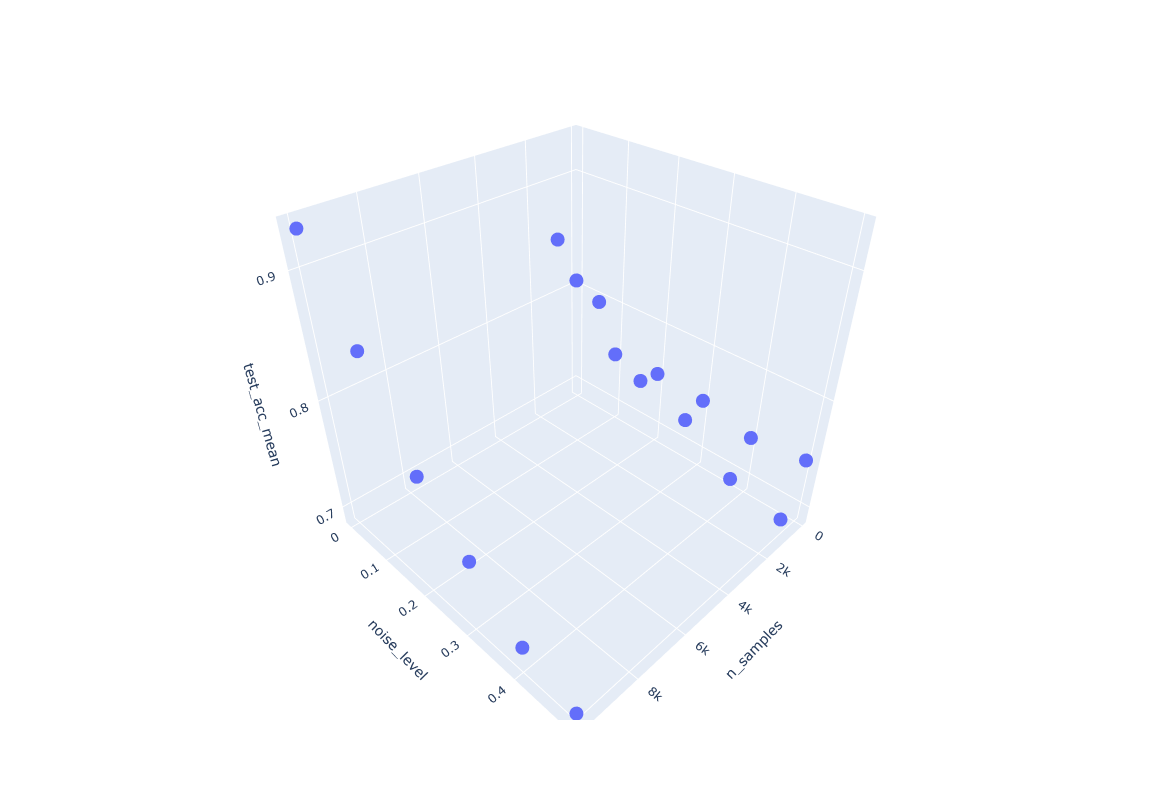

In [288]:
px.scatter_3d(g_results_df_noise,x = "n_samples",y = "noise_level", z = "test_acc_mean", height = 800)